In [1]:
import numpy as np

import os
from math import ceil

from statsmodels.stats.api import DescrStatsW
from scipy.stats import ttest_rel, sem

import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib

In [4]:
def labels_to_counts(labels, time_axis=0):
    onehot = np.zeros((labels.size, n_classes), dtype=int)
    onehot[np.arange(labels.size), labels] = 1
    return onehot.cumsum(axis=time_axis)


# data = 'square'
# budget = 100
# n_classes = 6
# class_names = ['center', 'corner1', 'corner2', 'corner3', 'corner4']

# data = 'citeseer'
# budget = 500
# n_classes = 5
# class_names = ['NeurIPS', 'ICML', 'UAI', 'JMLR']
# # class_names = ['JICAI', 'AAAI', 'NeurIPS', 'ICML', 'AI', 'UAI', 'JAIR', 'JMLR', 'ML']

data = 'fatemah_100'
budget = 100
n_classes = 30
class_names = [str(i) for i in range(1, n_classes)]

assert len(class_names) == n_classes - 1

policies = [
    'ens jensen greedy',
    'classical ens',
    'greedy',
    'round robin greedy',
    'round robin ens',
    'round robin ucb_0.3',
]
names = [
    'D-ENS',
    'ENS',
    'One-step',
    'RR-greedy',
    'RR-ENS',
    'RR-UCB',
]
    
linestyles = [
    '-',
    '--',
    'dotted',
    '-.',
    '-',
    '--'
]
assert len(policies) == len(linestyles)

n_exps = 20
init_size = 1
group_size = n_classes - 1

basepath = os.path.join('../../data/results', data, str(group_size))


class_counts = -1 * np.ones(
    (len(policies), n_exps, init_size + budget, n_classes), dtype=int
)

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        labels = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__labels__{i + 1}.csv'), 
            dtype=int
        ).flatten() - 1
        
        class_counts[p_ind, i, :] = labels_to_counts(labels)
        
assert np.all(class_counts != -1)

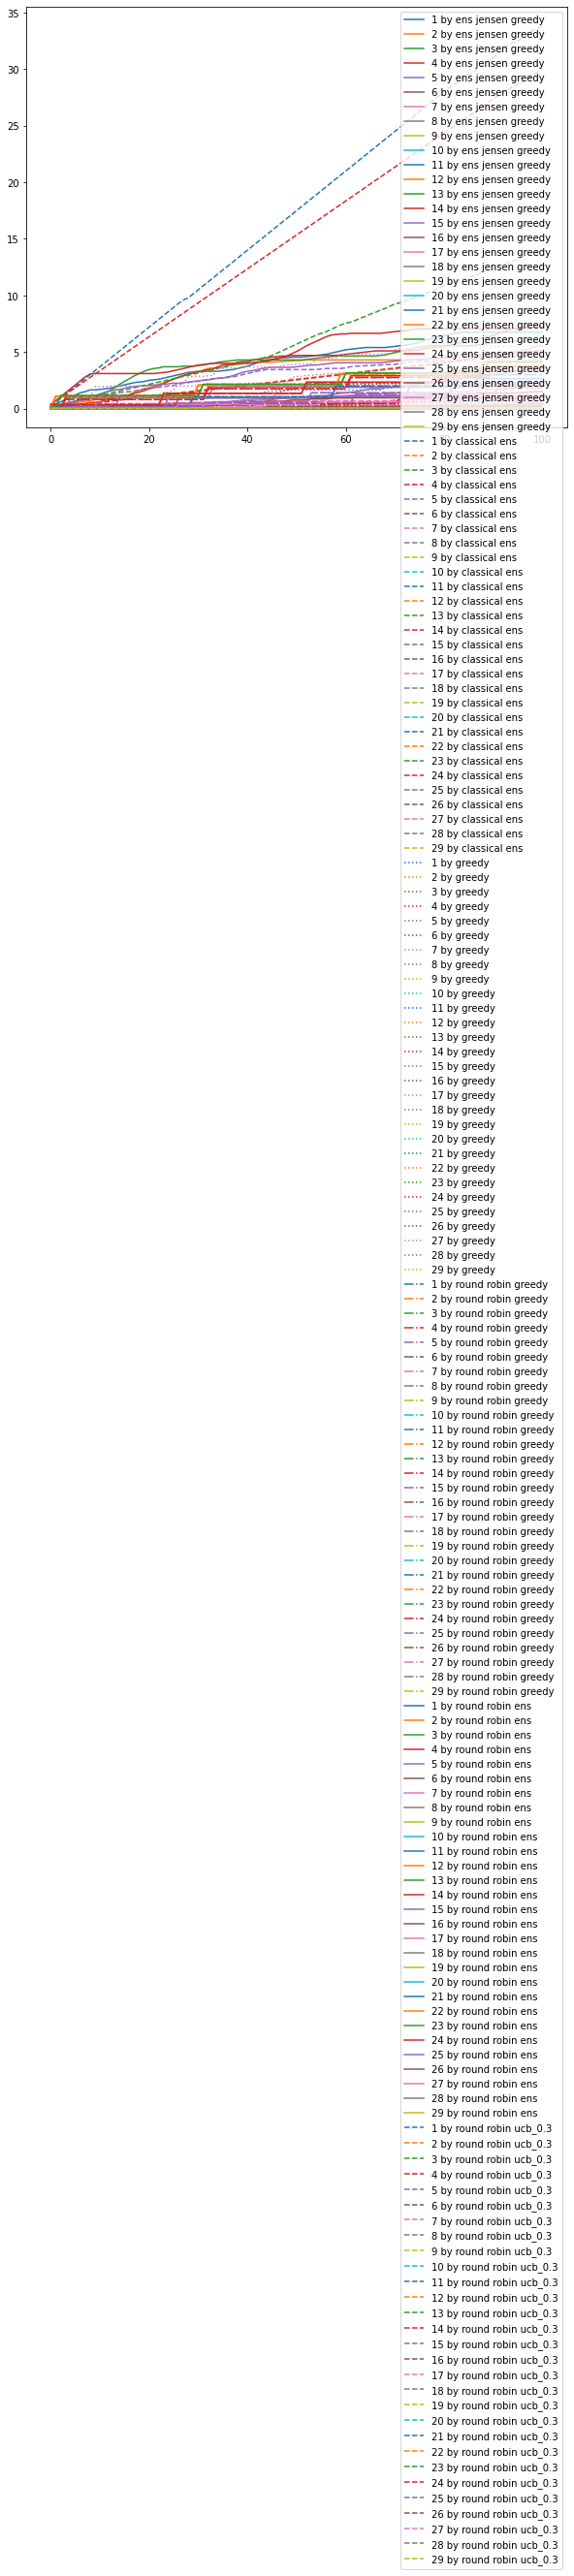

In [5]:
plt.figure(figsize=(10, 8))

for i, (policy, style) in enumerate(zip(policies, linestyles)):
    for c in range(1, n_classes):
        plt.plot(
            class_counts[i, :, :, c].mean(axis=0), 
            linestyle=style, 
            c=f'C{c - 1}', 
            label=f'{class_names[c - 1]} by {policy}'
        )
        
plt.legend();

In [6]:
class_counts.shape

(6, 20, 101, 30)

In [7]:
(class_counts[:, :, -1, :] > 0).sum(axis=2).mean(axis=1)

array([ 8.25,  2.15,  7.4 , 10.  , 11.35, 10.  ])

In [8]:
for p_ind, policy in enumerate(policies):
    print(f'{policy}: {(class_counts[p_ind, :, -1, :] > 0).sum(axis=1).mean(axis=0)}')

ens jensen greedy: 8.25
classical ens: 2.15
greedy: 7.4
round robin greedy: 10.0
round robin ens: 11.35
round robin ucb_0.3: 10.0


In [6]:
for p_ind, policy in enumerate(policies):
    print(f'{policy}: {(class_counts[p_ind, :, -1, :] > 0).sum(axis=1).mean(axis=0)}')

ens jensen greedy: 8.25
classical ens: 2.15
greedy: 7.4
round robin greedy: 10.0
round robin ens: 11.35


IndexError: index 2 is out of bounds for axis 0 with size 2

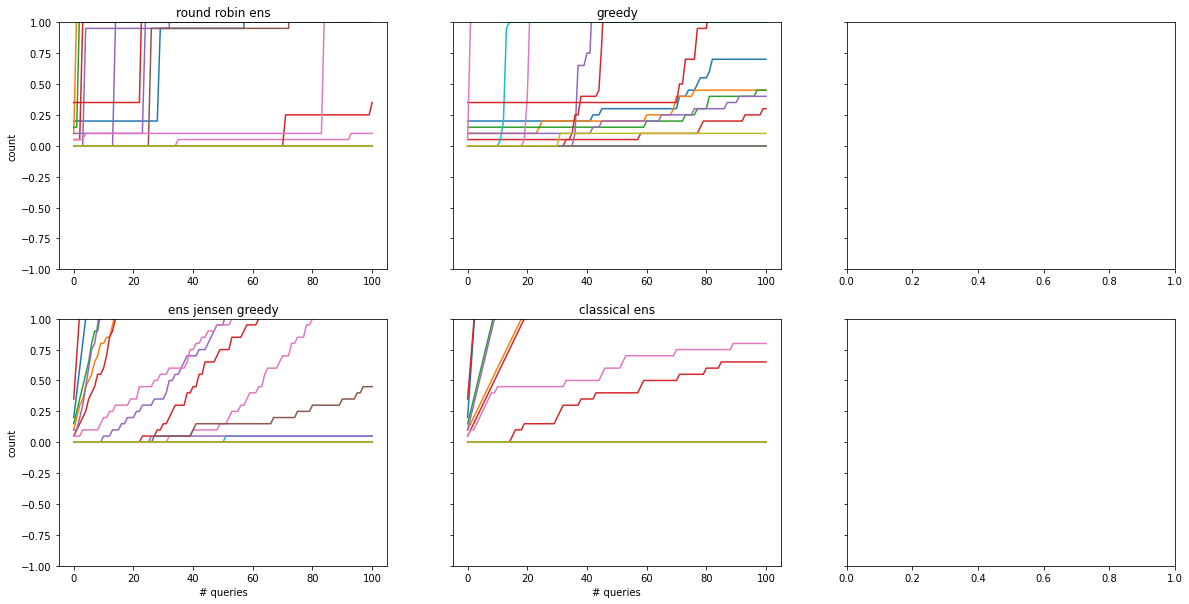

In [5]:
fig, ax = plt.subplots(
    2, 
    ceil(len(policies) / 2),
    figsize=(4 * len(policies), 10), 
    sharey=True
)

for i, (policy, style) in enumerate(zip(policies, linestyles)):
    tmp_ax = ax[i // 2][i % 2]
    
    for c in range(1, n_classes):
        tmp_ax.plot(
            class_counts[i, :, :, c].mean(axis=0),
            # linestyle=style, 
            c=f'C{c - 1}', 
            label=class_names[c - 1]
        )
        
        # tmp_ax.legend()
        tmp_ax.set_title(policy)
        tmp_ax.set_ylim((-1, 1))
    
    if i // 2 == len(ax) - 1:
        tmp_ax.set_xlabel('# queries')
    if i % 2 == 0:
        tmp_ax.set_ylabel('count')
        
plt.show()

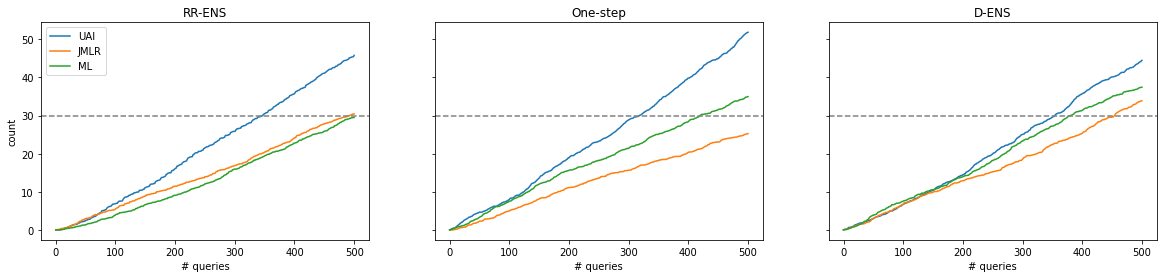

In [5]:
keep_names = ['UAI', 'JMLR', 'ML']

ref = 30

fig, ax = plt.subplots(
    1, 
    3,
    figsize=(20, 4), 
    sharey=True
)

for i, (policy, style) in enumerate(zip(policies, linestyles)):
    tmp_ax = ax[i]
    
    for c in range(1, n_classes):
        if class_names[c - 1] in keep_names:
            tmp_ax.plot(
                class_counts[i, :, :, c].mean(axis=0),
                # linestyle=style, 
                # c=f'C{c - 1}', 
                label=class_names[c - 1]
            )
            
            tmp_ax.set_title(names[i])
        
    tmp_ax.axhline(ref, c="gray", linestyle="--")
    
    tmp_ax.set_xlabel('# queries')

ax[0].set_ylabel('count')
ax[0].legend()
# plt.show()
tikzplotlib.save("citeseer.tex")